<h1>What to possibly do</h1>

<p><div>Find the top ten leading cauases of death</div><div>Find if the trend is increasing or decreasing</div></p>

In [144]:
import warnings

def warning(*args, **kwargs):
    pass

warnings.warn = warning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('C:/Users/Isaac/Desktop/DataScience')

In [3]:
from helper_class import clean_headers

In [4]:
annual_deaths_df = pd.read_csv('annual_number_deaths.csv')
cause_of_death_df = pd.read_csv('cause_of_death_clean.csv')

In [7]:
annual_deaths_df = clean_headers(annual_deaths_df)
cause_of_death_df = clean_headers(cause_of_death_df)

In [19]:
usa_deaths = annual_deaths_df[annual_deaths_df.entity == 'United States']
usa_deaths = usa_deaths.sort_values(by = 'year', ascending = False)

In [32]:
usa_deaths.replace(np.nan,0, inplace = True)

In [145]:
usa_deaths.columns.tolist()

['entity',
 'code',
 'year',
 'number_of_executions_amnesty_international',
 'deaths__meningitis__sex_both__age_all_ages_number',
 'deaths__neoplasms__sex_both__age_all_ages_number',
 'deaths__fire_heat_and_hot_substances__sex_both__age_all_ages_number',
 'deaths__malaria__sex_both__age_all_ages_number',
 'deaths__drowning__sex_both__age_all_ages_number',
 'deaths__interpersonal_violence__sex_both__age_all_ages_number',
 'deaths__hiv/aids__sex_both__age_all_ages_number',
 'deaths__drug_use_disorders__sex_both__age_all_ages_number',
 'deaths__tuberculosis__sex_both__age_all_ages_number',
 'deaths__road_injuries__sex_both__age_all_ages_number',
 'deaths__maternal_disorders__sex_both__age_all_ages_number',
 'deaths__lower_respiratory_infections__sex_both__age_all_ages_number',
 'deaths__neonatal_disorders__sex_both__age_all_ages_number',
 'deaths__alcohol_use_disorders__sex_both__age_all_ages_number',
 'deaths__exposure_to_forces_of_nature__sex_both__age_all_ages_number',
 'deaths__diarrh

In [147]:
usa_deaths.rename(columns = {'number_of_executions_amnesty_international': 'executions_amnesty_international',
                            'deaths__meningitis__sex_both__age_all_ages_number':'meningitis',
                            'deaths__neoplasms__sex_both__age_all_ages_number':'neoplasms',
                            'deaths__fire_heat_and_hot_substances__sex_both__age_all_ages_number':'fire_heat',
                            'deaths__malaria__sex_both__age_all_ages_number':'malaria',
                            'deaths__drowning__sex_both__age_all_ages_number':'drowning',
                             'deaths__interpersonal_violence__sex_both__age_all_ages_number':'interpersonal_violence',
                             'deaths__hiv/aids__sex_both__age_all_ages_number':'hiv_aids',
                             'deaths__drug_use_disorders__sex_both__age_all_ages_number':'drugs',
                             'deaths__tuberculosis__sex_both__age_all_ages_number':'tuberculosis',
                             'deaths__road_injuries__sex_both__age_all_ages_number':'road_injuries',
                             'deaths__maternal_disorders__sex_both__age_all_ages_number':'maternal_disorders',
                             'deaths__lower_respiratory_infections__sex_both__age_all_ages_number':'lower_respiratory_infections',
                             'deaths__neonatal_disorders__sex_both__age_all_ages_number':'neonatal',
                             'deaths__alcohol_use_disorders__sex_both__age_all_ages_number':'alcohol',
                             'deaths__exposure_to_forces_of_nature__sex_both__age_all_ages_number':'weather',
                             'deaths__diarrheal_diseases__sex_both__age_all_ages_number':'diarrheal_diseases',
                             'deaths__environmental_heat_and_cold_exposure__sex_both__age_all_ages_number':'environmental_hot_cold',
                             'deaths__nutritional_deficiencies__sex_both__age_all_ages_number':'nutritional_deficiencies',
                             'deaths__selfharm__sex_both__age_all_ages_number':'suicide',
                             'deaths__conflict_and_terrorism__sex_both__age_all_ages_number':'conflict_terrorism',
                             'deaths__diabetes_mellitus__sex_both__age_all_ages_number':'diabetes',
                             'deaths__poisonings__sex_both__age_all_ages_number':'poison',
                             'deaths__proteinenergy_malnutrition__sex_both__age_all_ages_number':'malnutrition',
                             'terrorism_deaths':'terrorism',
                             'deaths__cardiovascular_diseases__sex_both__age_all_ages_number':'cardiovascular_diseases',
                             'deaths__chronic_kidney_disease__sex_both__age_all_ages_number':'kidney_disease',
                             'deaths__chronic_respiratory_diseases__sex_both__age_all_ages_number':'respiratory_disease',
                             'deaths__cirrhosis_and_other_chronic_liver_diseases__sex_both__age_all_ages_number':'cirrhosis_liver_disease',
                             'deaths__digestive_diseases__sex_both__age_all_ages_number':'digestive_disease',
                             'deaths__acute_hepatitis__sex_both__age_all_ages_number':'hepatitis',
                             'deaths__alzheimers_disease_and_other_dementias__sex_both__age_all_ages_number':'alzheimers',
                             'deaths__parkinsons_disease__sex_both__age_all_ages_number':'parkinsons'}, inplace = True)

In [216]:
usa_deaths.columns.tolist()

['entity',
 'code',
 'year',
 'executions_amnesty_international',
 'meningitis',
 'neoplasms',
 'fire_heat',
 'malaria',
 'drowning',
 'interpersonal_violence',
 'hiv_aids',
 'drugs',
 'tuberculosis',
 'road_injuries',
 'maternal_disorders',
 'lower_respiratory_infections',
 'neonatal',
 'alcohol',
 'weather',
 'diarrheal_diseases',
 'environmental_hot_cold',
 'nutritional_deficiencies',
 'suicide',
 'conflict_terrorism',
 'diabetes',
 'poison',
 'malnutrition',
 'terrorism',
 'cardiovascular_diseases',
 'kidney_disease',
 'respiratory_disease',
 'cirrhosis_liver_disease',
 'digestive_disease',
 'hepatitis',
 'alzheimers',
 'parkinsons']

<p style = 'background-color:yellow'>Using all columns except the first 3</p>

<h1>Top 10 deaths</h1>

In [164]:
cols = usa_deaths.iloc[:,3:].columns.tolist()
usa_sum = pd.DataFrame(usa_deaths[cols].sum(), columns = ['total']).sort_values(by = 'total', ascending = False).reset_index()

usa_sum.rename(columns = {'index':'type'}, inplace = True)
usa_sum = usa_sum.astype({'total':'int'})

usa_sum = usa_sum.head(10)

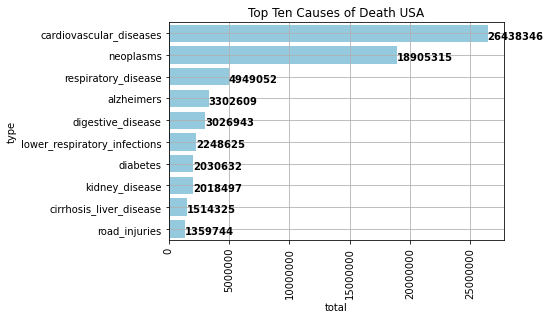

In [193]:
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')

sns.barplot(x = usa_sum['total'],y = usa_sum['type'],  orient = 'h', color = 'skyblue')

for i, v in enumerate(usa_sum['total']):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.title('Top Ten Causes of Death USA')
plt.grid(True)
plt.xticks(rotation = 90)

plt.show()

In [196]:
usa_sum.type.tolist()

['cardiovascular_diseases',
 'neoplasms',
 'respiratory_disease',
 'alzheimers',
 'digestive_disease',
 'lower_respiratory_infections',
 'diabetes',
 'kidney_disease',
 'cirrhosis_liver_disease',
 'road_injuries']

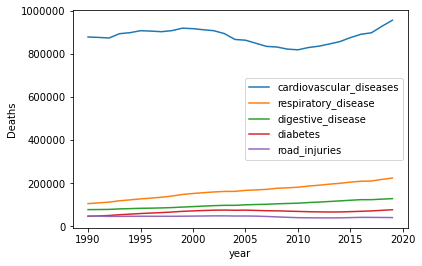

In [215]:
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')

cols = ['cardiovascular_diseases',
 'respiratory_disease',
 'digestive_disease',
 'diabetes',
 'road_injuries']

for each in cols:
    sns.lineplot(data = usa_deaths, x = 'year', y = each, label = str(each)) 
    
plt.ylabel('Deaths')
plt.legend()
plt.show()

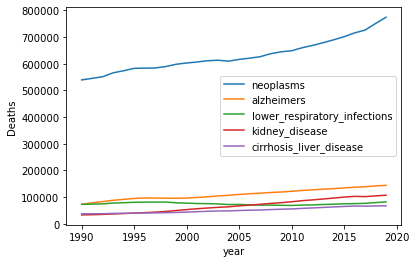

In [210]:
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')

cols = ['neoplasms',
 'alzheimers',
 'lower_respiratory_infections',
 'kidney_disease',
 'cirrhosis_liver_disease']

for each in cols:
    sns.lineplot(data = usa_deaths, x = 'year', y = each, label = str(each)) 
    
plt.ylabel('Deaths')
plt.legend()
plt.show()